## Lab 5 Practical - Unsupervised Learning
### Name: Lim Jian Wei 
### Student ID: P7339583

# K-means

In [2]:
# K-Means Clustering
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [3]:
#Load the iris clusters
datasets = load_iris()

#Fit a kMeans model to the data
model = KMeans(n_clusters=3)
model.fit(datasets.data)
print(model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


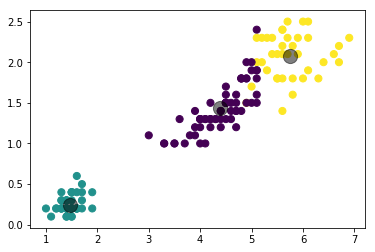

In [7]:
#Visualise the results
import matplotlib.pyplot as plt
X = datasets.data
y_kmeans = model.predict(X)

#scatter plot the petal length (column2), petal width (column3)
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis')

#show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)

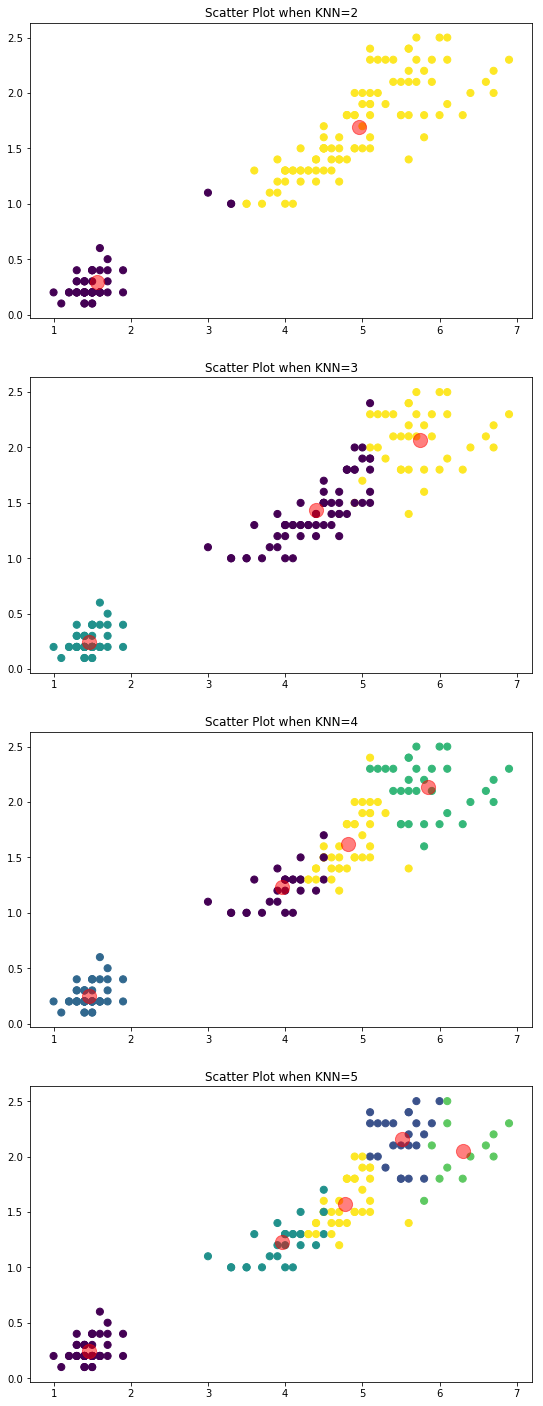

In [6]:
fig, axs = plt.subplots(4, figsize=(9,25))
#fig.suptitle('Sub Plot figures:: KMeans Ranging from 2 to 5')

i=0
for knn in range(2, 6):    
    #doing multiple plots showing the effect of different values of k range 2 to 5.
    knn_model = KMeans(knn, random_state=0)
    labels = knn_model.fit_predict(X)
    
    axs[i].set_title('Scatter Plot when KNN='+str(knn))
    axs[i].scatter(X[:, 2], X[:, 3], c=labels, s=50, cmap='viridis')
    
    #show centroid centres as grey circle opacity 50%
    centers = knn_model.cluster_centers_
    axs[i].scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.5)
    i+=1


# Clustering Silhouette_score

In [8]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [9]:
X = load_iris().data

In [10]:
distortions = []
K = range(2, 11)
for n_cluster in K:
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    
    distortions.append(kmeans.inertia_)

For n_clusters=2, The Silhouette Coefficient is 0.681046169211746
For n_clusters=3, The Silhouette Coefficient is 0.5528190123564091
For n_clusters=4, The Silhouette Coefficient is 0.4980505049972867
For n_clusters=5, The Silhouette Coefficient is 0.4887488870931048
For n_clusters=6, The Silhouette Coefficient is 0.3678464984712235
For n_clusters=7, The Silhouette Coefficient is 0.3588294450965675
For n_clusters=8, The Silhouette Coefficient is 0.35006029596867255
For n_clusters=9, The Silhouette Coefficient is 0.32933599450716505
For n_clusters=10, The Silhouette Coefficient is 0.30871199249914616


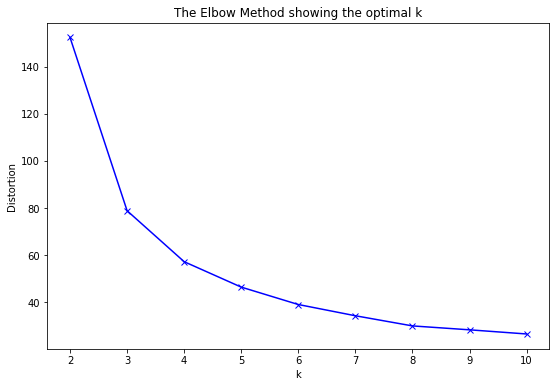

In [11]:
plt.figure(figsize=(9,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Anomaly Detection using K-Means

In [12]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.cluster import KMeans

In [13]:
#generate the data
X, label = make_blobs(100, centers = 1)

#get_the k means models
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


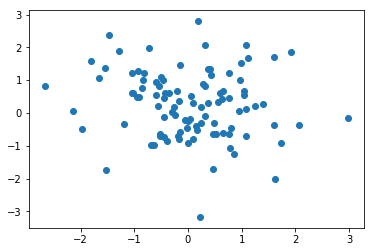

In [38]:
plt.scatter(X[:,0], X[:,1])

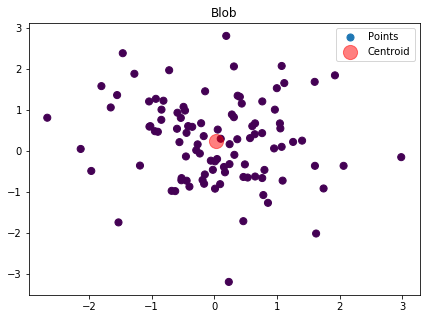

In [14]:
#Visualize the results
import matplotlib.pyplot as plt

y_kmeans = kmeans.predict(X)

#scatter plot the data points
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Blob')
ax.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis', label='Points')

# show centroid centres as red circle opacity 50%
centers = kmeans.cluster_centers_
ax.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5, label='Centroid')

ax.legend()
plt.show()

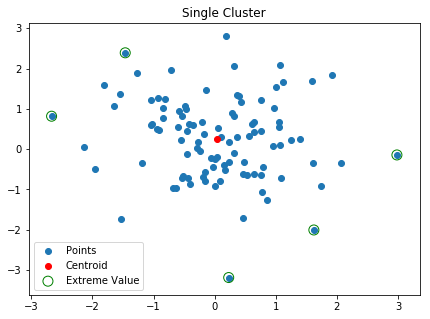

In [35]:
# identify the 5 closest points
# argsort returns an array of indexes which will sort the array in
# ascending order
# so we reverse it via [::-1] and take the top five with [:5]
distances = kmeans.transform(X)

In [ ]:
# [: 5] - get the index of first 5 biggest values 
# points with the biggest distance than the centroids
sorted_idx = np.argsort(distances.ravel())[::-1][:5]

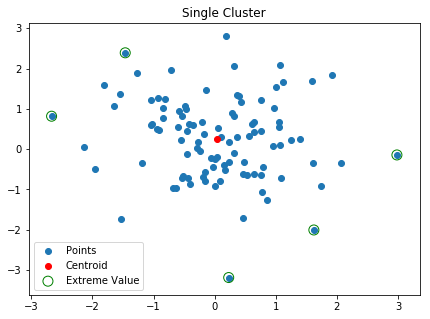

In [40]:
# Now let's see which are the top 5 points furthest away
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Single Cluster")
ax.scatter(X[:, 0], X[:, 1], label='Points')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0],
           centers[:, 1],
           label='Centroid', color='r')
ax.scatter(X[sorted_idx][:, 0], X[sorted_idx][:, 1],
           label='Extreme Value', edgecolors='g',
           facecolors='none', s=100)
ax.legend(loc='best')

In [46]:
# to remove these points if we like 
new_X = np.delete(X, sorted_idx, axis=0)

#to extract the anomalies
anomaly_X = X[sorted_idx,:]
print(anomaly_X)

[[ 0.22983349 -3.18667796]
 [ 2.98176668 -0.14479328]
 [ 1.62307463 -2.0066979 ]
 [-2.6676731   0.81633262]
 [-1.46281301  2.38956018]]


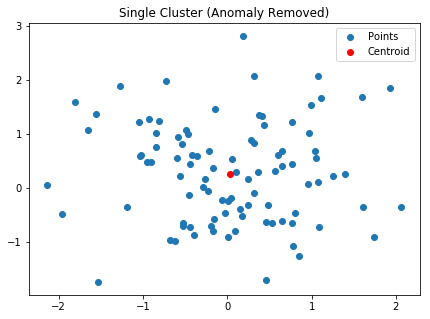

In [43]:
# Re-plot again with the points being removed......
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Single Cluster (Anomaly Removed)")
ax.scatter(new_X[:, 0], new_X[:, 1], label='Points')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0],
           centers[:, 1],
           label='Centroid', color='r')
ax.legend(loc='best')

# Isolation Clustering...

In [61]:
from sklearn.ensemble import IsolationForest

# generate the normal data, meaning bigger clusters
X1, label = make_blobs(100, centers=3, cluster_std = 3, center_box=[-20, 30])

# generate abnormal data
X2, label = make_blobs(10, centers=2, cluster_std = 2, center_box=[30, 40])


X = np.concatenate((X1, X2))

In [62]:
X1.shape, X2.shape, X.shape

((100, 2), (10, 2), (110, 2))

In [63]:
# fit the model
clf = IsolationForest(max_samples=100, random_state=42)
clf.fit(X)
y_pred = clf.predict(X)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


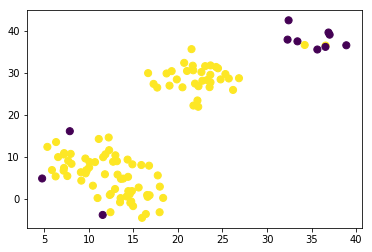

In [64]:
plt.scatter(X[:,0], X[:,1], c=y_pred, s=50, cmap='viridis')

## Agglomerative Clustering

In [66]:
# PCA reduce the dimension into only a few dimension allowing you to capture the variances of the overall data.
from sklearn.cluster import AgglomerativeClustering
X = load_iris().data
agg_model = AgglomerativeClustering(n_clusters=3)
clustering = agg_model.fit(X)
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

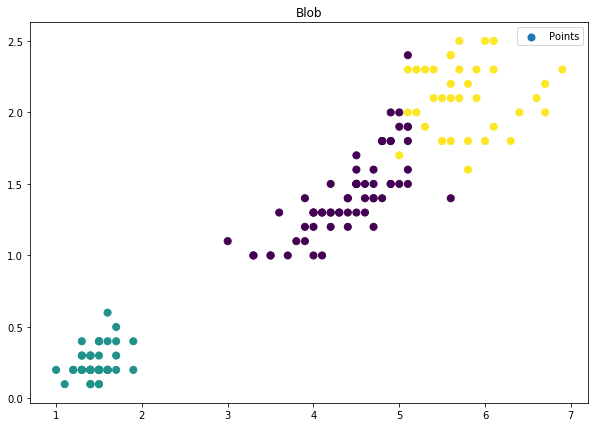

In [68]:
#scatter plot the data points
f, ax = plt.subplots(figsize=(10, 7))
ax.set_title('Blob')
ax.scatter(X[:,2], X[:,3], c=clustering.labels_, s=50, cmap='viridis', label='Points')

#show centroid centres as red circle opacity 50%
ax.legend()
plt.show()

In [69]:
import numpy as np
from sklearn.decomposition import PCA
X = load_iris().data
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [76]:
X2 = pca.transform(X)

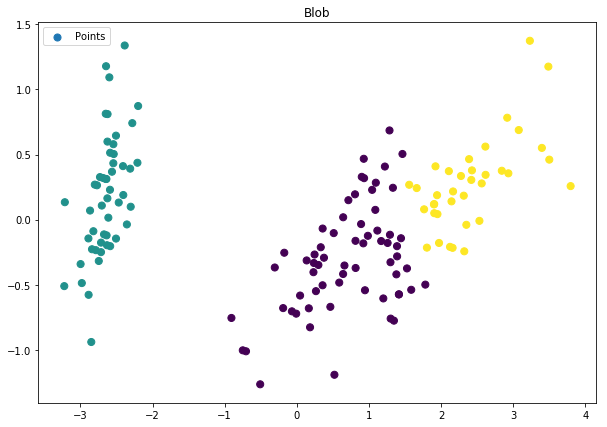

In [78]:
#scatter plot the data points
f, ax = plt.subplots(figsize=(10, 7))
ax.set_title('Blob')
ax.scatter(X2[:,0], X2[:,1], c=clustering.labels_, s=50, cmap='viridis', label='Points')

# show centroid centres as red circle opacity 50%
ax.legend()
plt.show()